# Lead Scoring Assignment 

### Problem Statement: 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

**Requirements of the Company:**

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


**Reason For Using Logistic Regression Model:**

Target Variable is 'Converted' which means the leads are joining the course or not . If 0 then they are not joining and if it is 1 then they are joining the course. From this we can see that our target variable is categorical in nature. So we can use Logistic Rrgression in our problem.

## Step 1: Reading & Understand/ing the Data

### 1.1 Reading The Data

In [1]:
# Importing Libraries required for reading the data

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Importing Libraries used for Visualization 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading The Data

lead = pd.read_csv('Leads.csv')

In [3]:
# Understanding the first 5 records/rows of dataset

lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Finding Shape of the Dataset
lead.shape

(9240, 37)

In [5]:
# Understanding columns in the dataset
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We have **9240 rows/records and 37 columns**

In [6]:
# Understanding about the Information of the dataset

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see the name of each column along with its **count and Datatype**

In [7]:
# Understanding the statistical Information of the Dataset

lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### 1.2 Understanding the Data 

In [8]:
# we will see different categories of some variables 

data_cols =['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','Last Activity','Country','Specialization', 
           'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course', 
           'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
           'Receive More Updates About Our Courses','Tags','Lead Quality','Update me on Supply Chain Content', 
           'Get updates on DM Content','Lead Profile', 'City','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview','Last Notable Activity'] 
for i in data_cols:
    print(i,'categories:')
    print('      ')
    print(lead[i].value_counts())
    print('--------------')     

Lead Origin categories:
      
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------
Lead Source categories:
      
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
--------------
Do Not Email categories:
      
No     8506
Yes     734
Name: Do Not Email, dtype: int64
--------------
Do Not Call categories:
      
No 

From Above Information we can see that: 
- For Target variable -> 'Converted'
    - Out of **9240 records of customers 5679 customers(61.46%) are not converted and 3561 customers(38.54%) are converted**

## Step 2: Pre-Processing / Cleaning the Data

### 2.1 Checking Missing Values

In [9]:
# Checking the Number of missing values 

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**We have some variables which have missing values**

In [10]:
# Checking the percentage of missing values 

null_percent = (round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending = False))
null_percent[null_percent > 0]

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

We have 17 variables with null values in it

In [11]:
# Dropping the columns whose null_percent is greater than 30

for column in lead.columns:
    if null_percent[column] > 30:
        lead.drop(column,axis = 1, inplace = True)

In [12]:
null_percent = (round(100*(lead.isnull().sum()/len(lead.index)), 2)).sort_values(ascending = False)
null_percent[null_percent > 0]

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

- We can see that **6 columns (Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Score,Asymmetrique Activity Score,Asymmetrique Profile Index,Tags) are removed** because they have null_percent above 30         

**Now we have more 11 variables which has null values** 

We can see that some variables like **'Lead Profile','Specialization','How did you hear about X Education' has a category 'Select' in it which means the customers didn't selected anything from the given options.**

In [13]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [14]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

As 'Select' in high in number than other options we can remove it to lessen the missing values 

In [16]:
lead = lead[~pd.isnull(lead['Lead Profile'])]

In [17]:
null_percent = (round(100*(lead.isnull().sum()/len(lead.index)), 2)).sort_values(ascending = False)
null_percent[null_percent > 0]

Country                 24.58
Page Views Per Visit     1.99
TotalVisits              1.99
Last Activity            1.58
Lead Source              0.55
dtype: float64

In [18]:
lead = lead[~pd.isnull(lead['Page Views Per Visit'])]

In [19]:
null_percent = (round(100*(lead.isnull().sum()/len(lead.index)), 2)).sort_values(ascending = False)
null_percent[null_percent > 0]

Country        23.04
Lead Source     0.45
dtype: float64

In [20]:
lead = lead[~pd.isnull(lead['Lead Source'])]

In [21]:
null_percent = (round(100*(lead.isnull().sum()/len(lead.index)), 2)).sort_values(ascending = False)
null_percent[null_percent > 0]

Country    22.71
dtype: float64

- Now we can see that only column 'Country' has high missing values.
- 'Country' columns is not necessary because it doesn't play an imp role taking a course. So we can remove the column.
- We can also drop columns 'Prospect ID' and 'Lead Number' as they are not necessary in viewing conversion rate

In [22]:
lead.drop(['Country','Prospect ID','Lead Number'],axis = 1, inplace = True )

In [23]:
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

**Now we don't have any missing values in our dataset.**

In [24]:
lead.shape

(6372, 28)

Now we have only **6372 rows/records** that is 68.96% of clean data.

In [25]:
lead.head(3)

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   

             Last Activity           Specialization  ...  \
0  Page Visited on Website                   Select  ...   
1             Email Opened                   Select  ...   
2             Email Opened  Business Administration  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  

[3 rows x 28 columns]

In [26]:
lead.tail(3)

Lead Origin     Lead Source Do Not Email Do Not Call  \
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9236          0          2.0                          238   
9237          0          2.0                          199   
9239          1          6.0                         1279   

      Page Views Per Visit Last Activity           Specialization  ...  \
9236                   2.0      SMS Sent    Media and Advertising  ...   
9237                   2.0      SMS Sent  Business Administration  ...   
9239                   3.0      SMS Sent  Supply Chain Management  ...   

     Digital Advertisement Through Recommendations  \
9236                    No                      No   
9237                    No                      No   
9239                    No                      No   

     Receive More Updates About Our Courses Update me on Supply Chain Content  \
9236                                     No                                No   
9237                                     No                                No   
9239                                     No                                No   

     Get updates on DM Content    Lead Profile          City  \
9236                        No  Potential Lead        Mumbai   
9237                        No  Potential Lead        Mumbai   
9239                        No  Potential Lead  Other Cities   

     I agree to pay the amount through cheque  \
9236                                       No   
9237                                       No   
9239                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9239                                    Yes              Modified  

[3 rows x 28 columns]

As we removed some missing values the index values are disturbed . So, it is better to reset the Dataset

In [27]:
lead.reset_index(drop = True, inplace=True)

In [28]:
lead.head(3)

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   

             Last Activity           Specialization  ...  \
0  Page Visited on Website                   Select  ...   
1             Email Opened                   Select  ...   
2             Email Opened  Business Administration  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  

[3 rows x 28 columns]

In [29]:
lead.tail(3)

Lead Origin     Lead Source Do Not Email Do Not Call  \
6369  Landing Page Submission  Direct Traffic           No          No   
6370  Landing Page Submission  Direct Traffic          Yes          No   
6371  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
6369          0          2.0                          238   
6370          0          2.0                          199   
6371          1          6.0                         1279   

      Page Views Per Visit Last Activity           Specialization  ...  \
6369                   2.0      SMS Sent    Media and Advertising  ...   
6370                   2.0      SMS Sent  Business Administration  ...   
6371                   3.0      SMS Sent  Supply Chain Management  ...   

     Digital Advertisement Through Recommendations  \
6369                    No                      No   
6370                    No                      No   
6371                    No                      No   

     Receive More Updates About Our Courses Update me on Supply Chain Content  \
6369                                     No                                No   
6370                                     No                                No   
6371                                     No                                No   

     Get updates on DM Content    Lead Profile          City  \
6369                        No  Potential Lead        Mumbai   
6370                        No  Potential Lead        Mumbai   
6371                        No  Potential Lead  Other Cities   

     I agree to pay the amount through cheque  \
6369                                       No   
6370                                       No   
6371                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
6369                                    Yes              SMS Sent  
6370                                    Yes              SMS Sent  
6371                                    Yes              Modified  

[3 rows x 28 columns]

## Step 3: EDA(Exploratory Data Analysis)

We'll visualise our data using `matplotlib` and `seaborn`.

**Converted** is the Target Variable

In [30]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Do Not Email                                   6372 non-null   object 
 3   Do Not Call                                    6372 non-null   object 
 4   Converted                                      6372 non-null   int64  
 5   TotalVisits                                    6372 non-null   float64
 6   Total Time Spent on Website                    6372 non-null   int64  
 7   Page Views Per Visit                           6372 non-null   float64
 8   Last Activity                                  6372 non-null   object 
 9   Specialization                                 6372 

In [31]:
cont_cols = ['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
cat_cols = ['Lead Origin', 'Lead Source','Do Not Email','Do Not Call','Last Activity', 'Specialization', 
            'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course', 
            'Search', 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 
            'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 
            'Get updates on DM Content','Lead Profile','City', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview','Last Notable Activity']

**For Continuous Columns**

In [32]:
lead[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

Total Time Spent on Website  TotalVisits  Page Views Per Visit
count                  6372.000000  6372.000000           6372.000000
mean                    535.279190     3.606717              2.479565
std                     565.402288     4.852274              2.166345
min                       0.000000     0.000000              0.000000
25%                      34.000000     1.000000              1.000000
50%                     287.000000     3.000000              2.000000
75%                    1022.250000     5.000000              3.500000
90%                    1428.900000     8.000000              5.000000
95%                    1592.450000    10.000000              6.000000
99%                    1849.290000    17.290000              9.000000
max                    2272.000000   251.000000             55.000000

Boxplot of variable Total Time Spent on Website :


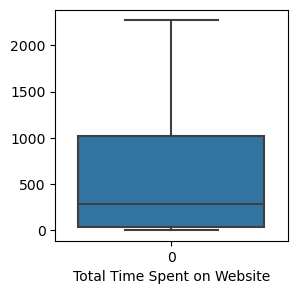

Boxplot of variable TotalVisits :


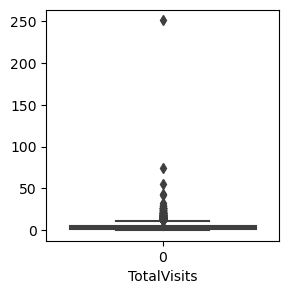

Boxplot of variable Page Views Per Visit :


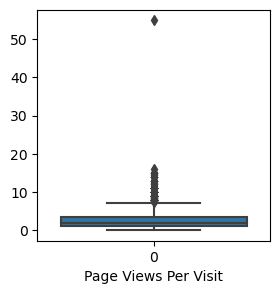

In [33]:
for col in cont_cols:
    plt.figure(figsize = (3, 3))
    print("Boxplot of variable",col,":")
    sns.boxplot(lead[col])
    plt.xlabel(col)
    plt.show()

We can see there are outliers in the variables 'TotalVisits' and 'Page Views Per Visit'. We will cap the outliers to 95% .

In [34]:
# capping the outliers for 'TotalVisits' variable
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][ lead['TotalVisits'] <= percentiles[0] ] = percentiles[0]
lead['TotalVisits'][ lead['TotalVisits'] >= percentiles[1] ] = percentiles[1]

In [35]:
# capping the outliers for 'Page Views Per Visit' variable
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

Boxplot of variable Total Time Spent on Website :


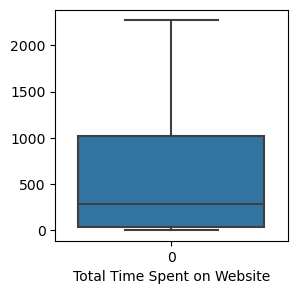

Boxplot of variable TotalVisits :


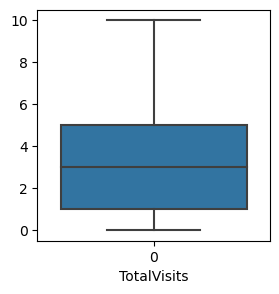

Boxplot of variable Page Views Per Visit :


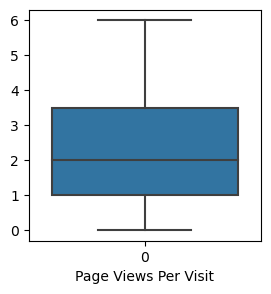

In [36]:
#  visualizing the plots again to check if outliers are present or not 

for col in cont_cols:
    plt.figure(figsize = (3, 3))
    print("Boxplot of variable",col,":")
    sns.boxplot(lead[col])
    plt.xlabel(col)
    plt.show()

Now we can see that there are **no outliers**

**For Categorical Columns**

Countplot of Lead Origin


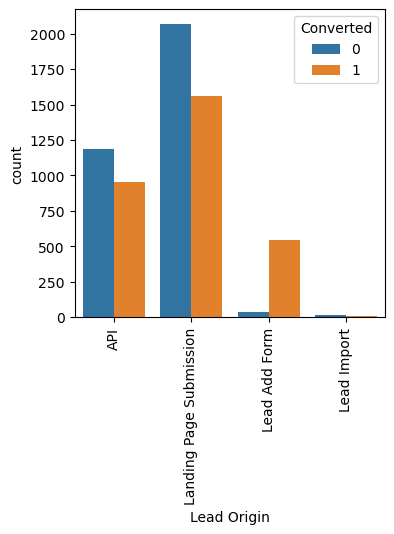

Countplot of Lead Source


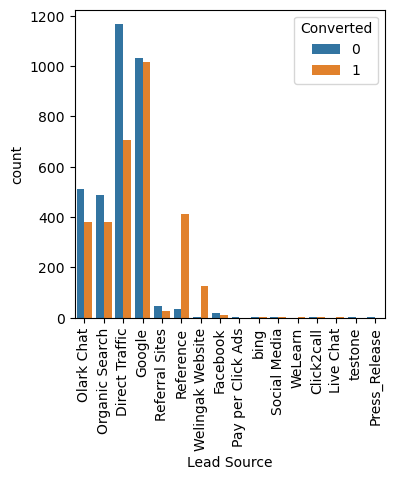

Countplot of Do Not Email


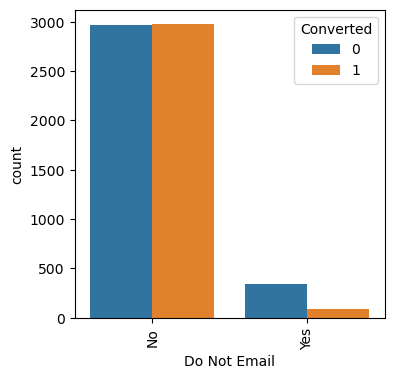

Countplot of Do Not Call


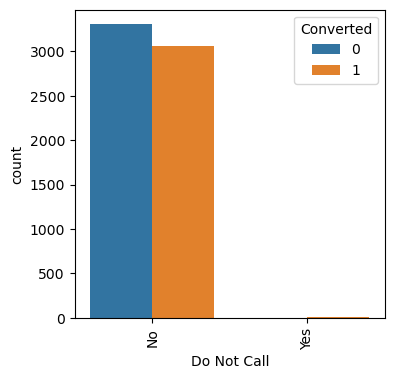

Countplot of Last Activity


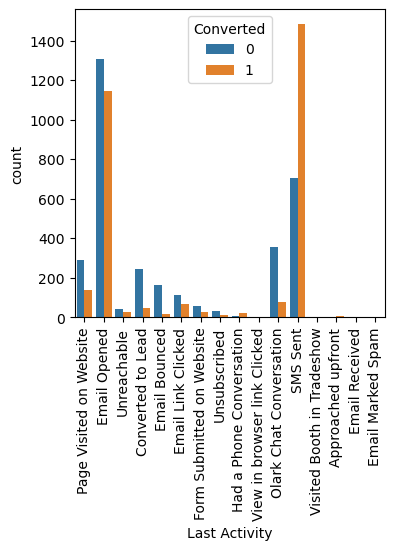

Countplot of Specialization


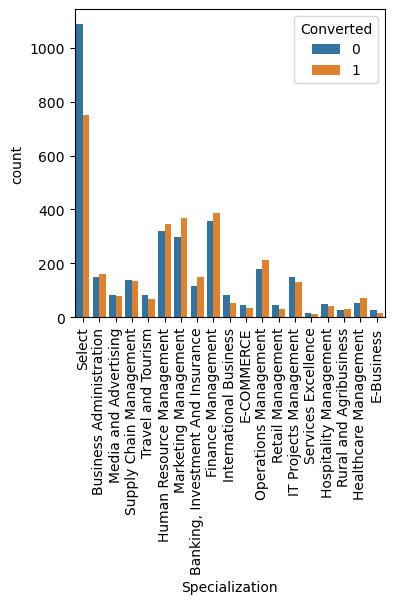

Countplot of How did you hear about X Education


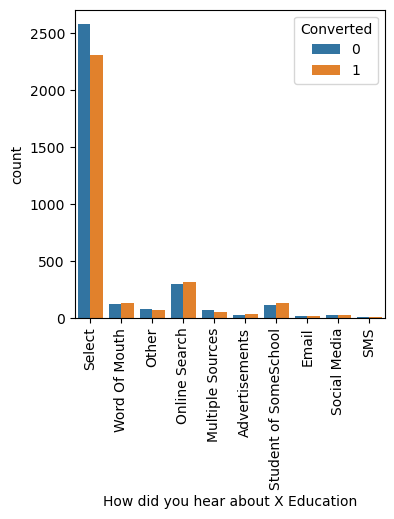

Countplot of What is your current occupation


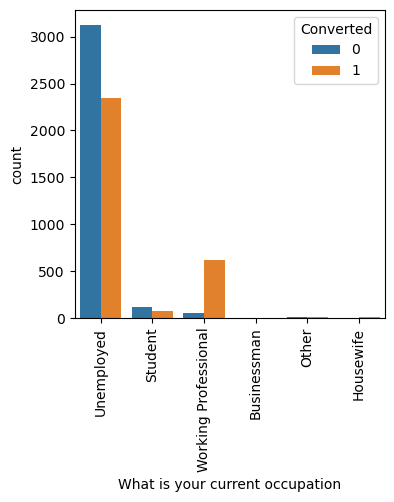

Countplot of What matters most to you in choosing a course


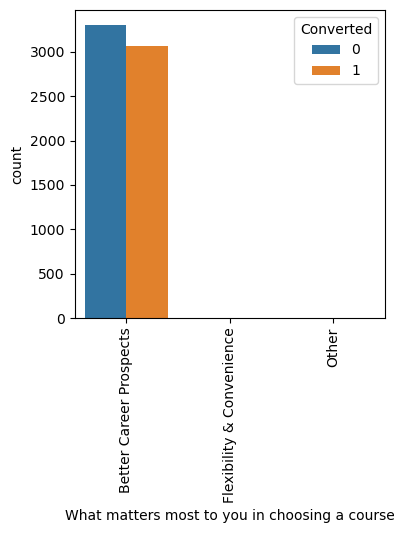

Countplot of Search


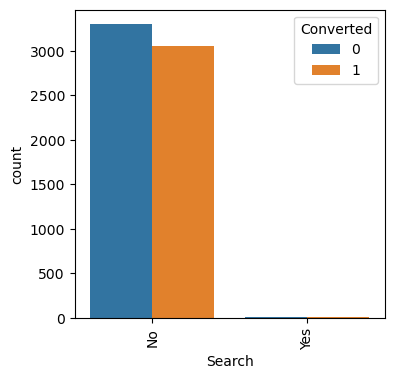

Countplot of Magazine


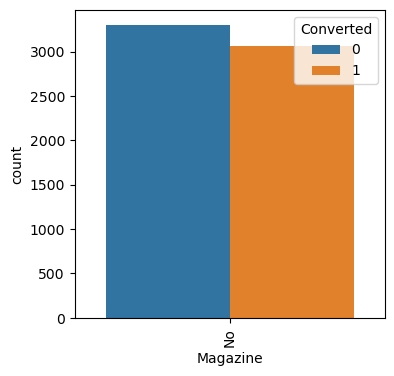

Countplot of Newspaper Article


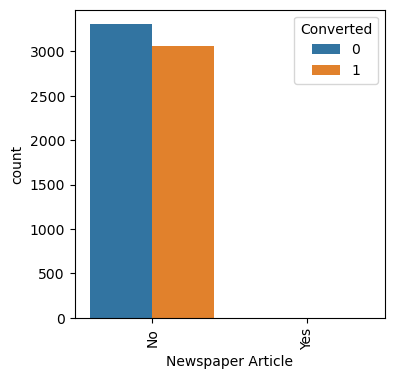

Countplot of X Education Forums


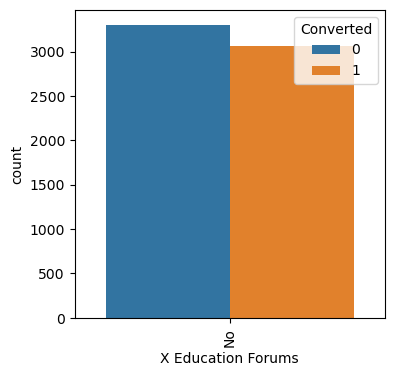

Countplot of Newspaper


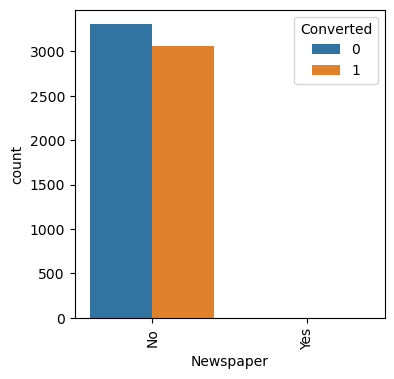

Countplot of Digital Advertisement


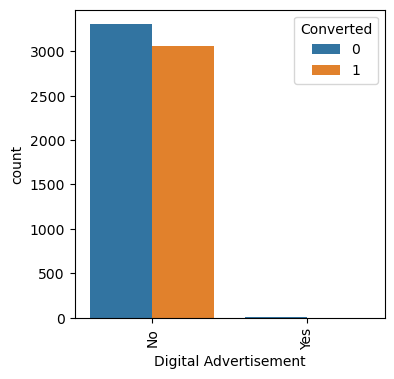

Countplot of Through Recommendations


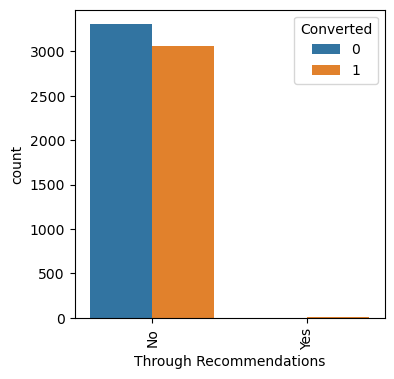

Countplot of Receive More Updates About Our Courses


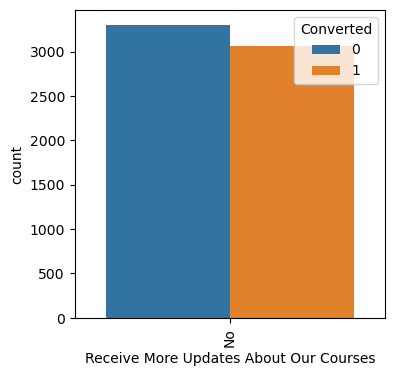

Countplot of Update me on Supply Chain Content


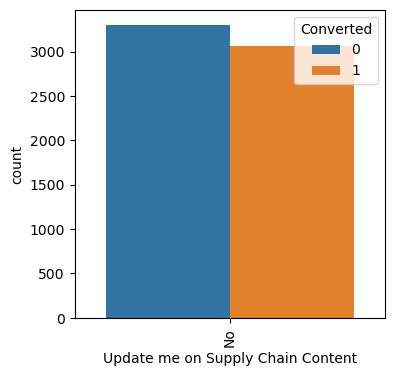

Countplot of Get updates on DM Content


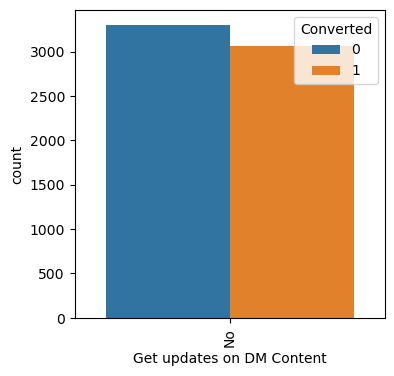

Countplot of Lead Profile


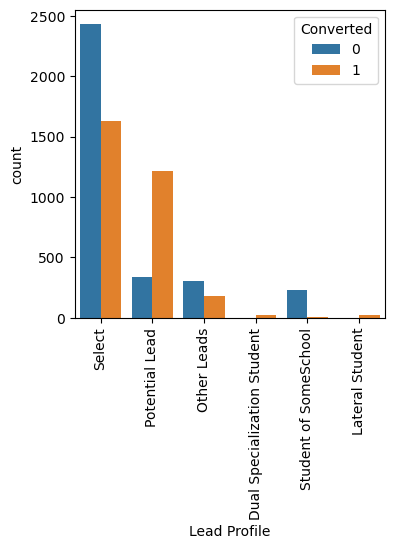

Countplot of City


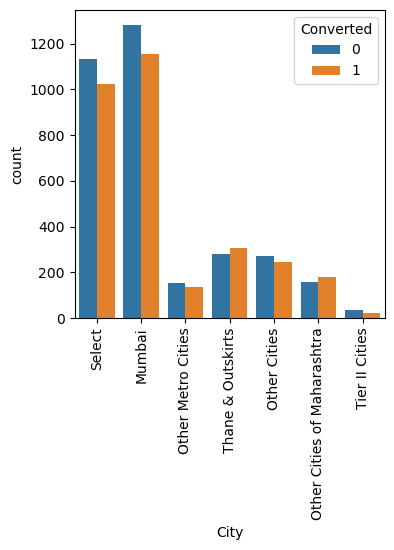

Countplot of I agree to pay the amount through cheque


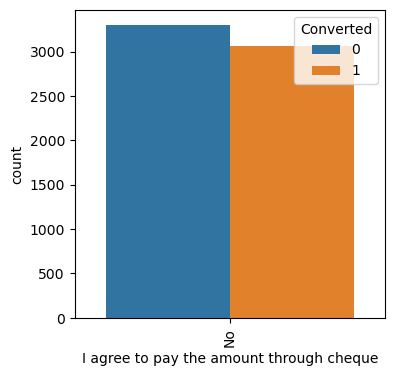

Countplot of A free copy of Mastering The Interview


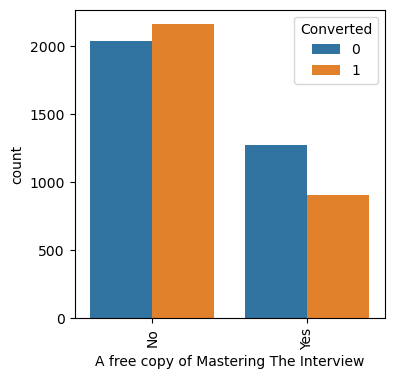

Countplot of Last Notable Activity


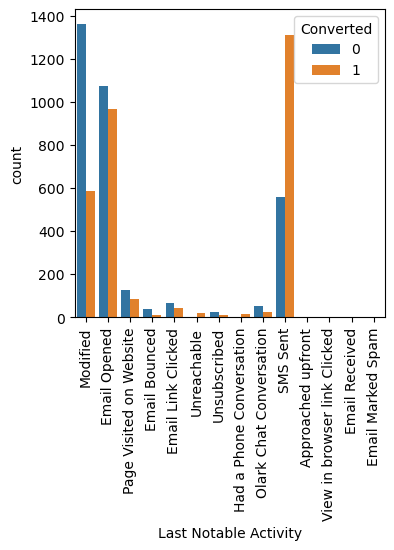

In [37]:
for col in cat_cols:
    plt.figure(figsize = (4, 4))
    print("Countplot of",col)
    sns.countplot(data = lead , x=col , hue = 'Converted')
    plt.xticks(rotation='vertical')
    plt.show()

From above plot :
- **Lead Origin** : API, Landing Page Submission, Lead Add Form brings good no of leads as well as conversion.
- **Lead Source** : From some of the sources there is high conversion rate.
- **Do Not Email** : Customers who selected not to send an email to them from customer support are equal in conversion rate 
- **Last Activity** : There is high conversion rate of customers whose last activity was SMS Sent
- **Specialization** : Most of the customers didn't selected their specialization but there is a good conversion rate.
- **What is your current occupation** : working professionals are highly converted
- **What matters most to you in choosing a course** : Most of the people who wanted to improve in their carrer are converted
- **Last Notable Activity** : Most of the people are converted with last notable activity as SMS Sent
- **A free copy of Mastering The Interview** : We can see a good conversion rate here
- **Lead Profile** : Potential Lead customers are highly converted
- Variables like **Do Not Call ,How did you hear about X Education ,Search ,Magazine ,Newspaper Article ,X Education Forums ,Newspaper ,Digital Advertisement ,Through Recommendations ,Receive More Updates About Our Courses ,Update me on Supply Chain Content ,Get updates on DM Content ,City ,I agree to pay the amount through cheque** have more customers who are not interested . So these columns can be removed.

### Analysing the Relation Between Variables using Pair Plot

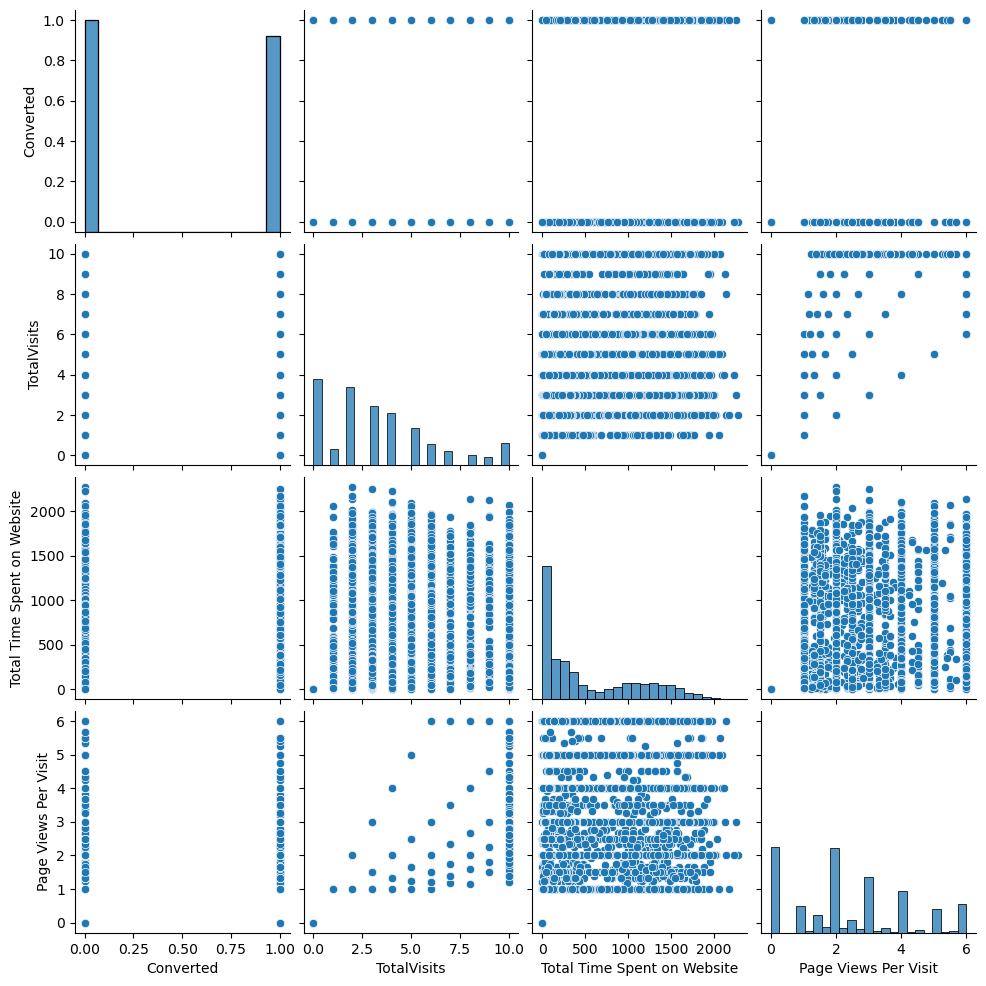

In [38]:
sns.pairplot(lead)
plt.show()

In [39]:
lead.corr()

Converted  TotalVisits  \
Converted                     1.000000     0.005591   
TotalVisits                   0.005591     1.000000   
Total Time Spent on Website   0.313277     0.355267   
Page Views Per Visit         -0.068420     0.753740   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                       0.313277             -0.068420  
TotalVisits                                     0.355267              0.753740  
Total Time Spent on Website                     1.000000              0.355513  
Page Views Per Visit                            0.355513              1.000000

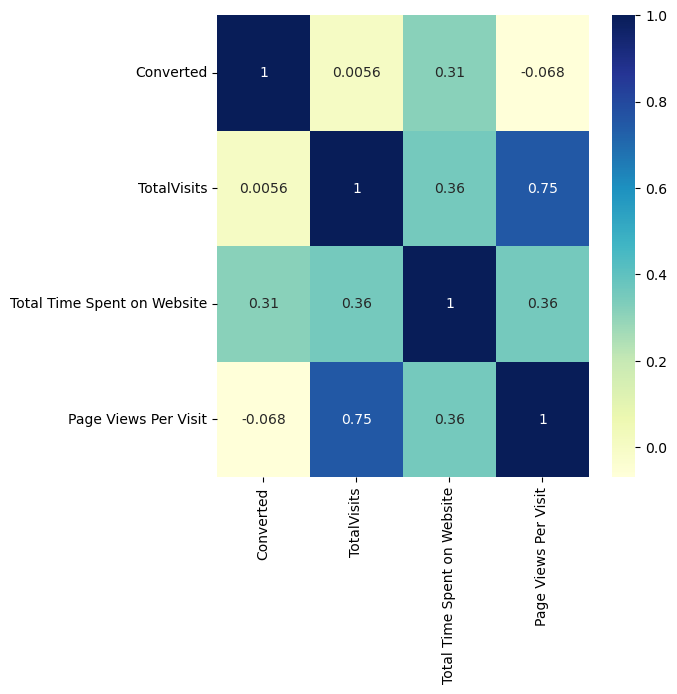

In [40]:
plt.figure(figsize = (6,6))
sns.heatmap(lead.corr(), annot = True, cmap="YlGnBu")
plt.show()

'Total Time Spent on Website' has a better correlation with 'Converted' than other variables 

## Step 4: Preparing Data For Modelling

We will follow some steps:

1. Dropping the columns which are not necessary 
2. Creating Dummy Variables
3. splitting into Train and test data
4. Rescaling Variables

### 4.1 Dropping Unnecessary Columns

We can remove some columns like below where customers has mostly selected option No . So below columns are not useful
- **'Search'** has 6362 - No and only 10 - Yes
- **'I agree to pay the amount through cheque'** column has almost 6372 No category 
- **'Magazine'** has 6372 - No
- **'NewsPaper Article'** has 6371 - No and only 1 -Yes
- **'X Education Forums'** has 6372 - No
- **'NewsPaper'** has 6371 - No and only 1 -Yes
- **'Digital Advertisement'** has 6369 - No and 3 - Yes
- **'Through Recommendations'** has 6366 - No and 6 - Yes
- **'Receive More Updates About Our Courses'** has 6372- No
- **'Update me on Supply Chain Content'** has 6372 - No
- **'Get updates on DM Content'** has 6372- No
- **'Do Not Call'** has 6370 - No and 2 - Yes
- **City** column is not so useful to take a course in online

In [41]:
removable_cols = ['Search','I agree to pay the amount through cheque','Magazine','Newspaper Article','X Education Forums',
                  'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content', 'Get updates on DM Content','Do Not Call',
                  'How did you hear about X Education','Lead Profile','City','What matters most to you in choosing a course']

In [42]:
lead.drop(removable_cols,axis = 1, inplace = True)

In [43]:
lead.head(2)

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0         API      Olark Chat           No          0          0.0   
1         API  Organic Search           No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Specialization What is your current occupation  \
0         Select                      Unemployed   
1         Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened

In [44]:
lead.shape

(6372, 12)

We are now left with **6372 rows/records and 12 columns**

### 4.2 Creating Dummy Variables

As Logistic Regression model works only with numerical values we need to convert some categorical variables in the dataset to numerical by creating dummy variables. 

In [45]:
categorical_variables = lead[['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation'
                               ,'Last Notable Activity','A free copy of Mastering The Interview']]

In [46]:
# observing different sub categories of a variable

for col in categorical_variables:
    print(col,'categories:')
    print('     ')
    print(lead[col].value_counts())
    print('--------------')     

Lead Origin categories:
     
Landing Page Submission    3624
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64
--------------
Lead Source categories:
     
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         74
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: Lead Source, dtype: int64
--------------
Do Not Email categories:
     
No     5938
Yes     434
Name: Do Not Email, dtype: int64
--------------
Last Activity categories:
     
Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          426
Converted to Lead  

In [47]:
# Creating Dummy Variable

dummy_variables = pd.get_dummies(categorical_variables,drop_first=True)
dummy_variables.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  ...  \
0                           0                              0  ...   
1                           1                              0  ...   
2                           0                              0  ...   
3                           0                              0  ...   
4                           0                              0  ...   

   Last Notable Activity_Email Received  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  \
0                                                  0    
1                                     

#### Adding Dummy variables into the DataFrame

In [48]:
lead = pd.concat([lead,dummy_variables],axis=1)

In [49]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
#  drop that level by specifying it explicitly

dummy_specialization = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy_specialization = dummy_specialization.drop(['Specialization_Select'], 1)
lead = pd.concat([lead, dummy_specialization], axis = 1)

In [50]:
lead.head(2)

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0         API      Olark Chat           No          0          0.0   
1         API  Organic Search           No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Specialization What is your current occupation  ...  \
0         Select                      Unemployed  ...   
1         Select                      Unemployed  ...   

  Specialization_IT Projects Management Specialization_International Business  \
0                                     0                                     0   
1                                     0                                     0   

   Specialization_Marketing Management  Specialization_Media and Advertising  \
0                                    0                                     0   
1                                    0                                     0   

   Specialization_Operations Management  Specialization_Retail Management  \
0                                     0                                 0   
1                                     0                                 0   

   Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0                                      0                                   0   
1                                      0                                   0   

   Specialization_Supply Chain Management  Specialization_Travel and Tourism  
0                                       0                                  0  
1                                       0                                  0  

[2 rows x 83 columns]

We have 83 columns 

#### Removing Categorical Columns/ Repeated Columns in dataset

In [51]:
lead.drop(categorical_variables,axis =1,inplace=True)

In [52]:
lead.drop('Specialization',axis = 1, inplace = True )

In [53]:
lead.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

In [54]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6372 non-null   int64  
 1   TotalVisits                                           6372 non-null   float64
 2   Total Time Spent on Website                           6372 non-null   int64  
 3   Page Views Per Visit                                  6372 non-null   float64
 4   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 6   Lead Origin_Lead Import                               6372 non-null   uint8  
 7   Lead Source_Direct Traffic                            6372 non-null   uint8  
 8   Lead Source_Facebook                                  6372

In [55]:
lead.shape

(6372, 75)

**Now we have 6372 rows/records and 75 columns**

###  4.3 Splitting the Data into Training and Testing Sets

In [56]:
# importing libraries used for splitting the data
import sklearn
from sklearn.model_selection import train_test_split

In [57]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                     

In [58]:
# Assigning response/target variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Considering 70:30 ratio
np.random.seed(0)
lead_X_train, lead_X_test, lead_y_train, lead_y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
lead_X_train.shape

(4460, 74)

In [61]:
lead_X_test.shape

(1912, 74)

### 4.4 Rescaling the Features of Train dataset

Using **Standardization Scaling Method**

In [62]:
# importing Libraries used for Scaling the data
from sklearn.preprocessing import StandardScaler

In [63]:
lead.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

Variables **'TotalVisits','Total Time Spent on Website','Page Views Per Visit'** should be scaled

In [64]:
lead_X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  4460.000000                  4460.000000           4460.000000
mean      3.364350                   533.874439              2.378063
std       2.798172                   563.660618              1.790984
min       0.000000                     0.000000              0.000000
25%       1.000000                    33.750000              1.000000
50%       3.000000                   287.000000              2.000000
75%       5.000000                  1024.000000              4.000000
max      10.000000                  2272.000000              6.000000

In [65]:
scaler = StandardScaler()
lead_X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(lead_X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
lead_X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2735     0.227192                     0.701078              0.905714   
4625     2.371689                     1.228050             -0.211116   
5264    -1.202473                    -0.947262             -1.327946   
149      0.584608                    -0.312057              1.464129   
1377    -0.487641                    -0.288991             -0.211116   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2735                                    1                          0   
4625                                    1                          0   
5264                                    0                          0   
149                                     0                          0   
1377                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
2735                        0                           1   
4625                        0                           1   
5264                        0                           0   
149                         0                           0   
1377                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
2735                     0                   0                      0  ...   
4625                     0                   0                      0  ...   
5264                     0                   0                      0  ...   
149                      0                   0                      0  ...   
1377                     0                   1                      0  ...   

      Specialization_IT Projects Management  \
2735                                      1   
4625                                      0   
5264                                      0   
149                                       0   
1377                                      0   

      Specialization_International Business  \
2735                                      0   
4625                                      0   
5264                                      0   
149                                       0   
1377                                      0   

      Specialization_Marketing Management  \
2735                                    0   
4625                                    0   
5264                                    0   
149                                     0   
1377                                    0   

      Specialization_Media and Advertising  \
2735                                     0   
4625                                     0   
5264                                     0   
149                                      0   
1377                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
2735                                     0                                 0   
4625                                     0                                 0   
5264                                     0                                 0   
149                                      0                                 0   
1377                                     0                                 0   

      Specialization_Rural and Agribusiness  \
2735                                      0   
4625                                      0   
5264                                      0   
149                                       0   
1377                                      0   

      Specialization_Services Excellence  \
2735                                   0   
4625                                   0   
5264                                   0   
149                                    0   
1377                                   0   

      Specialization_Supply Chain Management  \
2735                                       0   
4625                                       1   
5264             

In [66]:
lead_X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  4.460000e+03                 4.460000e+03          4.460000e+03
mean  -9.319899e-17                -9.558871e-18          7.866154e-17
std    1.000112e+00                 1.000112e+00          1.000112e+00
min   -1.202473e+00                -9.472620e-01         -1.327946e+00
25%   -8.450570e-01                -8.873789e-01         -7.695309e-01
50%   -1.302245e-01                -4.380333e-01         -2.111159e-01
75%    5.846079e-01                 8.696377e-01          9.057140e-01
max    2.371689e+00                 3.083984e+00          2.022544e+00

In [67]:
### Checking the Conversion Rate
conversion_rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion_rate

48.10106716886378

We have 48% of conversion rate

### Looking at Correlations

In [68]:
lead.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

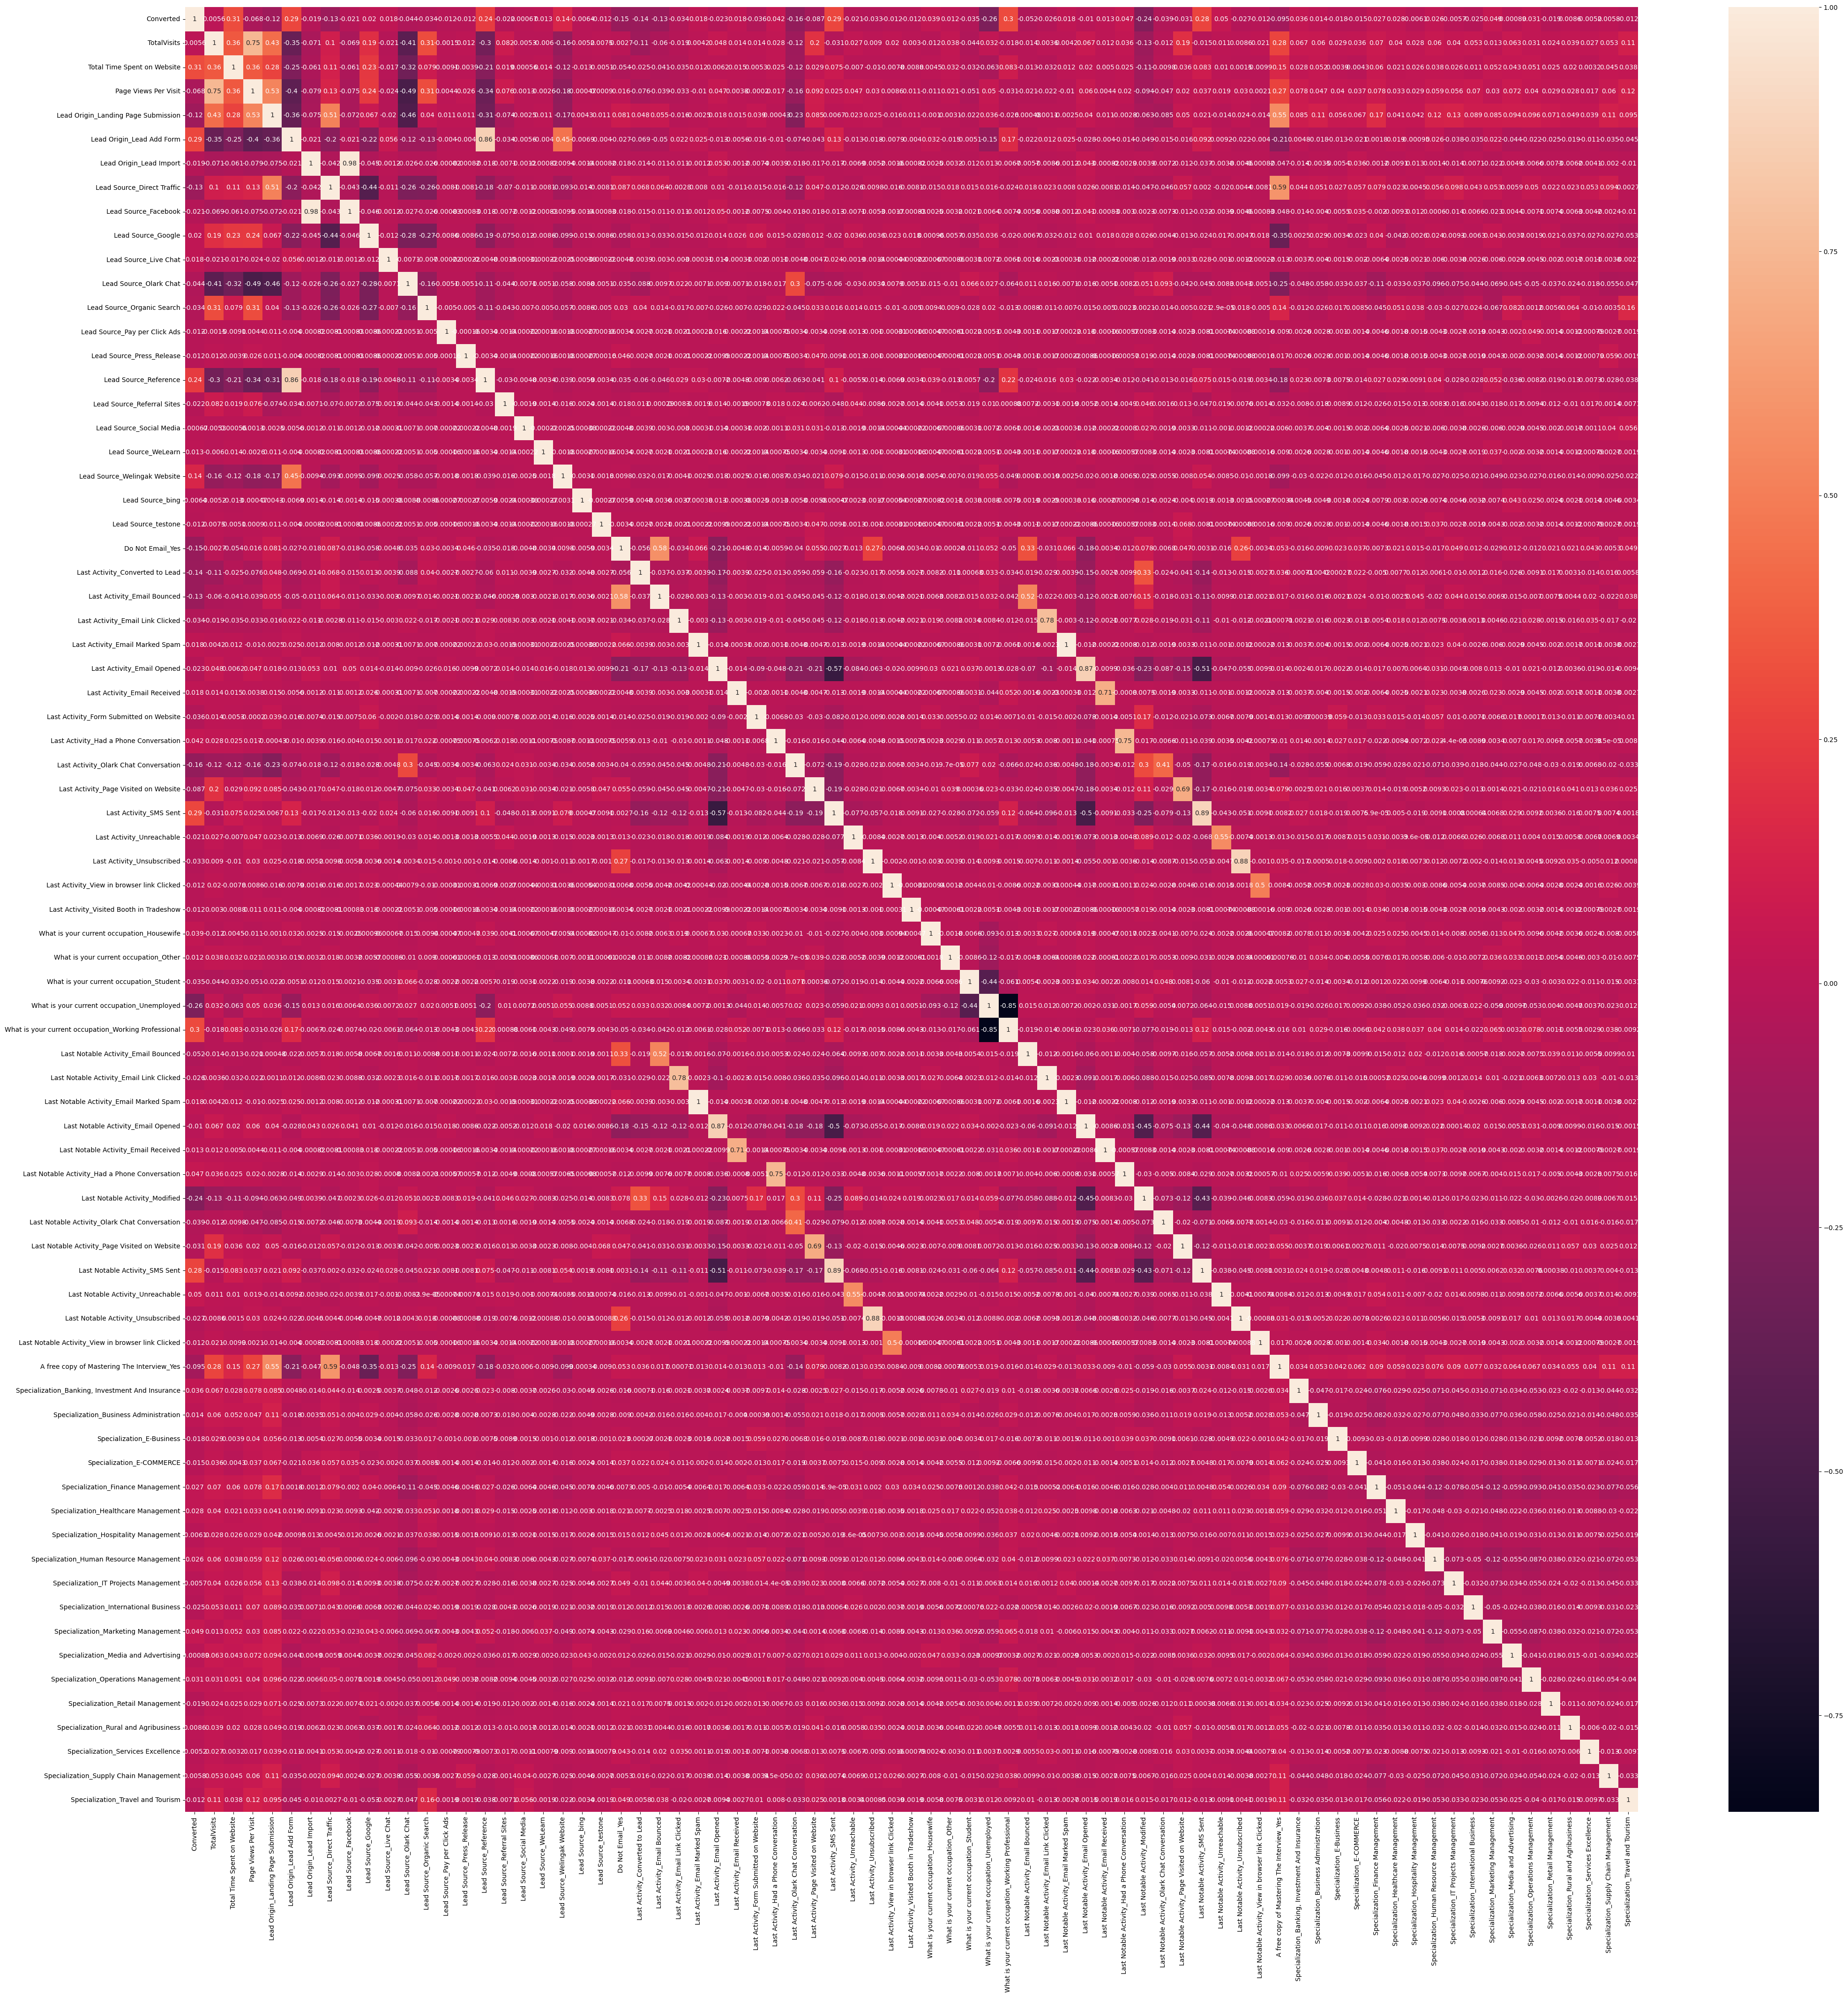

In [69]:
# Correlation Matrix
plt.figure(figsize = (50,50))   
sns.heatmap(lead.corr(),annot = True)
plt.show()

- Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_SMS Sent,What is your current occupation_Working Professional has correlation with Converted variable.
- Lead Origin_Lead Import and Lead Source_Facebook has a high correlation of 0.98 ( indicates multicollinearity)
- Lead Origin_Lead Add Form and Lead Source_Reference also has a high correlation of 0.86
- Total Visits and Page Views per Visit has a correlation of 0.75

In [70]:
lead.reset_index(drop=True,inplace = True )
lead.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

## Step 5: Model Building

In [71]:
lead_X_train.shape

(4460, 74)

- We have 74 columns in lead_X_train 
- If we perform Manual approach method it will be difficult
- So, we will first use automated approach(**RFE method - Recursive Feature Elimination Method**) and can eliminate some columns 

### Using Automated approach (RFE method) to eliminate some columns

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(lead_X_train, lead_y_train)

In [74]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False])

In [75]:
list(zip(lead_X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 54),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 56),
 ('Lead Source_testone', False, 41),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Lin

In [76]:
cols = lead_X_train.columns[rfe.support_]

In [77]:
lead_X_train = lead_X_train[cols]

In [78]:
# Selected columns by RFE
lead_X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Services Excellence'],
      dtype='object')

### Building Models

In [79]:
# Importing Librarie which gives lot of statistical features
import statsmodels.api as sm

Here, you use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data 

- **A model is said to be significant if it has less p value**
- **VIF tells how correlated the variable is with other Variable**
- **So VIF also should be low i.e., VIF<5**

#### Model 1

In [80]:
lead_X_train_sm = sm.add_constant(lead_X_train)
logm1 = sm.GLM(lead_y_train ,lead_X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.0
Date:                Tue, 23 May 2023   Deviance:                       4102.0
Time:                        14:24:46   Pearson chi2:                 4.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1427      0.610      1.873      0.061      -0.053       2.338
Total Time Spent on Website                              1.1185      0.047     23.963      0.000       1.027       1.210
Lead Origin_Lead Add Form                                1.8311      0.980      1.868      0.062      -0.090       3.752
Lead Source_Olark Chat                                   1.3611      0.114     11.897      0.000       1.137       1.585
Lead Source_Reference                                    2.0145      1.006      2.003      0.045       0.044       3.986
Lead Source_Welingak Website                             4.2400      1.405      3.018      0.003       1.486       6.993
Do Not Email_Yes                                        -1.2996      0.189     -6.885      0.000      -1.670      -0.930
Last Activity_Had a Phone Conversation                   1.6003      1.006      1.591      0.112      -0.371       3.572
Last Activity_SMS Sent                                   0.9893      0.084     11.796      0.000       0.825       1.154
What is your current occupation_Student                 -2.0028      0.647     -3.094      0.002      -3.272      -0.734
What is your current occupation_Unemployed              -1.9357      0.611     -3.168      0.002      -3.133      -0.738
What is your current occupation_Working Professional     0.5666      0.639      0.887      0.375      -0.685       1.818
Last Notable Activity_Had a Phone Conversation          21.4261    1.2e+04      0.002      0.999   -2.35e+04    2.35e+04
Last Notable Activity_Modified                          -0.8741      0.090     -9.762      0.000      -1.050      -0.699
Last Notable Activity_Unreachable                        2.5120      0.801      3.134      0.002       0.941       4.083
Specialization_Services Excellence                      -1.9241      0.941     -2.044      0.041      -3.769      -0.079
========================================================================================================================
"""

#### Checking VIF

In [81]:
# Checking VIF values for the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = lead_X_train.columns
vif['VIF'] = [variance_inflation_factor(lead_X_train.values, i) for i in range(lead_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                           Lead Origin_Lead Add Form  69.33
3                               Lead Source_Reference  53.91
4                        Lead Source_Welingak Website  16.55
6              Last Activity_Had a Phone Conversation   2.85
11     Last Notable Activity_Had a Phone Conversation   2.85
9          What is your current occupation_Unemployed   2.44
7                              Last Activity_SMS Sent   1.68
12                     Last Notable Activity_Modified   1.56
2                              Lead Source_Olark Chat   1.38
10  What is your current occupation_Working Profes...   1.31
0                         Total Time Spent on Website   1.29
5                                    Do Not Email_Yes   1.09
8             What is your current occupation_Student   1.05
13                  Last Notable Activity_Unreachable   1.01
14                 Specialization_Services Excellence   1.01

- We have few variables with high VIF. So, we can drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 
- The variable 'Lead Origin_Lead Add Form' has the highest VIF of 69.33. So we can drop that variable.

In [83]:
lead_X_train = lead_X_train.drop('Lead Origin_Lead Add Form',axis = 1)

In [84]:
lead_X_train.columns

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Services Excellence'],
      dtype='object')

In [85]:
lead_X_train.shape

(4460, 14)

Now we are left with 14 columns.

**Model 2**

In [86]:
lead_X_train_sm = sm.add_constant(lead_X_train)
logm2 = sm.GLM(lead_y_train ,lead_X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.8
Date:                Tue, 23 May 2023   Deviance:                       4105.7
Time:                        14:24:47   Pearson chi2:                 4.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1439      0.610      1.876      0.061      -0.051       2.339
Total Time Spent on Website                              1.1153      0.047     23.947      0.000       1.024       1.207
Lead Source_Olark Chat                                   1.3592      0.114     11.898      0.000       1.135       1.583
Lead Source_Reference                                    3.8394      0.242     15.843      0.000       3.364       4.314
Lead Source_Welingak Website                             6.0645      1.011      6.001      0.000       4.084       8.045
Do Not Email_Yes                                        -1.3024      0.189     -6.903      0.000      -1.672      -0.933
Last Activity_Had a Phone Conversation                   1.5982      1.005      1.590      0.112      -0.372       3.569
Last Activity_SMS Sent                                   0.9899      0.084     11.808      0.000       0.826       1.154
What is your current occupation_Student                 -2.0030      0.647     -3.095      0.002      -3.272      -0.735
What is your current occupation_Unemployed              -1.9328      0.611     -3.165      0.002      -3.130      -0.736
What is your current occupation_Working Professional     0.5660      0.638      0.887      0.375      -0.685       1.817
Last Notable Activity_Had a Phone Conversation          21.4232    1.2e+04      0.002      0.999   -2.35e+04    2.35e+04
Last Notable Activity_Modified                          -0.8749      0.089     -9.778      0.000      -1.050      -0.700
Last Notable Activity_Unreachable                        2.5071      0.801      3.129      0.002       0.937       4.078
Specialization_Services Excellence                      -1.9247      0.941     -2.046      0.041      -3.769      -0.081
========================================================================================================================
"""

#### Checking VIF

In [87]:
vif = pd.DataFrame()
vif['Features'] = lead_X_train.columns
vif['VIF'] = [variance_inflation_factor(lead_X_train.values, i) for i in range(lead_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5              Last Activity_Had a Phone Conversation  2.85
10     Last Notable Activity_Had a Phone Conversation  2.85
8          What is your current occupation_Unemployed  2.44
6                              Last Activity_SMS Sent  1.68
11                     Last Notable Activity_Modified  1.56
1                              Lead Source_Olark Chat  1.38
9   What is your current occupation_Working Profes...  1.31
0                         Total Time Spent on Website  1.29
2                               Lead Source_Reference  1.29
4                                    Do Not Email_Yes  1.09
3                        Lead Source_Welingak Website  1.07
7             What is your current occupation_Student  1.05
12                  Last Notable Activity_Unreachable  1.01
13                 Specialization_Services Excellence  1.01

- After removing variable 'Lead Origin_Lead Add Form' VIF values of other variables are also reduced 
- But p-values of some variables are high and we can remove that
- So, we can remove the variable 'Last Notable Activity_Had a Phone Conversation' as it has a high p-value of 0.999

In [88]:
lead_X_train = lead_X_train.drop('Last Notable Activity_Had a Phone Conversation',axis = 1)

In [89]:
lead_X_train.columns

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Services Excellence'],
      dtype='object')

In [90]:
lead_X_train.shape

(4460, 13)

Now we are left with 13 columns.

#### Model 3

In [91]:
lead_X_train_sm = sm.add_constant(lead_X_train)
logm3 = sm.GLM(lead_y_train ,lead_X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.9
Date:                Tue, 23 May 2023   Deviance:                       4109.7
Time:                        14:24:47   Pearson chi2:                 4.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1475      0.610      1.882      0.060      -0.048       2.343
Total Time Spent on Website                              1.1140      0.047     23.928      0.000       1.023       1.205
Lead Source_Olark Chat                                   1.3580      0.114     11.888      0.000       1.134       1.582
Lead Source_Reference                                    3.8390      0.242     15.838      0.000       3.364       4.314
Lead Source_Welingak Website                             6.0634      1.011      6.000      0.000       4.083       8.044
Do Not Email_Yes                                        -1.3024      0.189     -6.903      0.000      -1.672      -0.933
Last Activity_Had a Phone Conversation                   2.9068      0.799      3.637      0.000       1.340       4.473
Last Activity_SMS Sent                                   0.9882      0.084     11.790      0.000       0.824       1.152
What is your current occupation_Student                 -2.0039      0.647     -3.096      0.002      -3.272      -0.735
What is your current occupation_Unemployed              -1.9333      0.611     -3.165      0.002      -3.130      -0.736
What is your current occupation_Working Professional     0.5654      0.638      0.886      0.376      -0.686       1.817
Last Notable Activity_Modified                          -0.8837      0.089     -9.885      0.000      -1.059      -0.709
Last Notable Activity_Unreachable                        2.5035      0.801      3.124      0.002       0.933       4.074
Specialization_Services Excellence                      -1.9254      0.941     -2.047      0.041      -3.769      -0.081
========================================================================================================================
"""

#### Checking VIF

In [92]:
vif = pd.DataFrame()
vif['Features'] = lead_X_train.columns
vif['VIF'] = [variance_inflation_factor(lead_X_train.values, i) for i in range(lead_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8          What is your current occupation_Unemployed  2.44
6                              Last Activity_SMS Sent  1.68
10                     Last Notable Activity_Modified  1.55
1                              Lead Source_Olark Chat  1.38
9   What is your current occupation_Working Profes...  1.31
0                         Total Time Spent on Website  1.29
2                               Lead Source_Reference  1.29
4                                    Do Not Email_Yes  1.09
3                        Lead Source_Welingak Website  1.07
7             What is your current occupation_Student  1.05
5              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01
12                 Specialization_Services Excellence  1.01

- VIF values of all variables are less than 5
- But p-values of some variables are high and we can remove that
- So, we can remove the variable 'What is your current occupation_Working Professional' as it has a high p-value of 0.376

In [93]:
lead_X_train = lead_X_train.drop('What is your current occupation_Working Professional',axis = 1)

In [94]:
lead_X_train.columns

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Services Excellence'],
      dtype='object')

In [95]:
lead_X_train.shape

(4460, 12)

Now we are left with 12 variables

#### Model 4

In [96]:
lead_X_train_sm = sm.add_constant(lead_X_train)
logm4 = sm.GLM(lead_y_train ,lead_X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.2
Date:                Tue, 23 May 2023   Deviance:                       4110.5
Time:                        14:24:47   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3707
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6671      0.187      8.893      0.000       1.300       2.035
Total Time Spent on Website                    1.1139      0.047     23.925      0.000       1.023       1.205
Lead Source_Olark Chat                         1.3588      0.114     11.895      0.000       1.135       1.583
Lead Source_Reference                          3.8397      0.242     15.842      0.000       3.365       4.315
Lead Source_Welingak Website                   6.0631      1.011      6.000      0.000       4.082       8.044
Do Not Email_Yes                              -1.3024      0.189     -6.901      0.000      -1.672      -0.933
Last Activity_Had a Phone Conversation         2.9082      0.799      3.639      0.000       1.342       4.475
Last Activity_SMS Sent                         0.9906      0.084     11.831      0.000       0.827       1.155
What is your current occupation_Student       -2.5241      0.285     -8.846      0.000      -3.083      -1.965
What is your current occupation_Unemployed    -2.4538      0.187    -13.115      0.000      -2.821      -2.087
Last Notable Activity_Modified                -0.8840      0.089     -9.886      0.000      -1.059      -0.709
Last Notable Activity_Unreachable              2.5054      0.801      3.127      0.002       0.935       4.076
Specialization_Services Excellence            -1.9081      0.936     -2.038      0.042      -3.743      -0.073
==============================================================================================================
"""

#### Checking VIF

In [97]:
vif = pd.DataFrame()
vif['Features'] = lead_X_train.columns
vif['VIF'] = [variance_inflation_factor(lead_X_train.values, i) for i in range(lead_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   What is your current occupation_Unemployed  2.21
6                       Last Activity_SMS Sent  1.52
9               Last Notable Activity_Modified  1.49
1                       Lead Source_Olark Chat  1.35
0                  Total Time Spent on Website  1.25
2                        Lead Source_Reference  1.17
4                             Do Not Email_Yes  1.09
3                 Lead Source_Welingak Website  1.07
7      What is your current occupation_Student  1.04
5       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01
11          Specialization_Services Excellence  1.01

- VIF values of all variables are less than 5
- We can remove the variable 'Specialization_Services Excellence' as it has a high p-value of 0.042

In [98]:
lead_X_train = lead_X_train.drop('Specialization_Services Excellence', axis =1 )

In [99]:
lead_X_train.columns

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [100]:
lead_X_train.shape

(4460, 11)

Now we are left with 11 columns

#### Model 5

In [101]:
lead_X_train_sm = sm.add_constant(lead_X_train)
logm5 = sm.GLM(lead_y_train ,lead_X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2057.8
Date:                Tue, 23 May 2023   Deviance:                       4115.5
Time:                        14:24:47   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3699
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6456      0.186      8.824      0.000       1.280       2.011
Total Time Spent on Website                    1.1135      0.047     23.939      0.000       1.022       1.205
Lead Source_Olark Chat                         1.3630      0.114     11.937      0.000       1.139       1.587
Lead Source_Reference                          3.8447      0.242     15.865      0.000       3.370       4.320
Lead Source_Welingak Website                   6.0691      1.011      6.006      0.000       4.088       8.050
Do Not Email_Yes                              -1.3186      0.188     -6.997      0.000      -1.688      -0.949
Last Activity_Had a Phone Conversation         2.9113      0.799      3.643      0.000       1.345       4.478
Last Activity_SMS Sent                         0.9894      0.084     11.827      0.000       0.825       1.153
What is your current occupation_Student       -2.5044      0.285     -8.797      0.000      -3.062      -1.946
What is your current occupation_Unemployed    -2.4365      0.186    -13.085      0.000      -2.801      -2.072
Last Notable Activity_Modified                -0.8814      0.089     -9.864      0.000      -1.057      -0.706
Last Notable Activity_Unreachable              2.5098      0.801      3.133      0.002       0.940       4.080
==============================================================================================================
"""

#### Checking VIF

In [102]:
vif = pd.DataFrame()
vif['Features'] = lead_X_train.columns
vif['VIF'] = [variance_inflation_factor(lead_X_train.values, i) for i in range(lead_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   What is your current occupation_Unemployed  2.21
6                       Last Activity_SMS Sent  1.52
9               Last Notable Activity_Modified  1.49
1                       Lead Source_Olark Chat  1.35
0                  Total Time Spent on Website  1.25
2                        Lead Source_Reference  1.17
4                             Do Not Email_Yes  1.09
3                 Lead Source_Welingak Website  1.07
7      What is your current occupation_Student  1.04
5       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

- VIF values of all variables are less than 5
- We can remove the variable 'Last Notable Activity_Unreachable' as it has a high p-value of 0.002

In [103]:
lead_X_train = lead_X_train.drop('Last Notable Activity_Unreachable',axis = 1)

In [104]:
lead_X_train.columns

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified'],
      dtype='object')

In [105]:
lead_X_train.shape

(4460, 10)

Now we are left with 10 columns

#### Model 6

In [106]:
lead_X_train_sm = sm.add_constant(lead_X_train)
logm6 = sm.GLM(lead_y_train ,lead_X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.7
Date:                Tue, 23 May 2023   Deviance:                       4129.5
Time:                        14:24:48   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3680
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6755      0.186      9.000      0.000       1.311       2.040
Total Time Spent on Website                    1.1088      0.046     23.911      0.000       1.018       1.200
Lead Source_Olark Chat                         1.3516      0.114     11.866      0.000       1.128       1.575
Lead Source_Reference                          3.8374      0.242     15.848      0.000       3.363       4.312
Lead Source_Welingak Website                   6.0571      1.011      5.994      0.000       4.076       8.038
Do Not Email_Yes                              -1.3266      0.188     -7.044      0.000      -1.696      -0.957
Last Activity_Had a Phone Conversation         2.8949      0.799      3.623      0.000       1.329       4.461
Last Activity_SMS Sent                         0.9722      0.083     11.652      0.000       0.809       1.136
What is your current occupation_Student       -2.5238      0.284     -8.872      0.000      -3.081      -1.966
What is your current occupation_Unemployed    -2.4446      0.186    -13.142      0.000      -2.809      -2.080
Last Notable Activity_Modified                -0.8965      0.089    -10.053      0.000      -1.071      -0.722
==============================================================================================================
"""

#### Checking VIF 

In [107]:
vif = pd.DataFrame()
vif['Features'] = lead_X_train.columns
vif['VIF'] = [variance_inflation_factor(lead_X_train.values, i) for i in range(lead_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8  What is your current occupation_Unemployed  2.19
6                      Last Activity_SMS Sent  1.52
9              Last Notable Activity_Modified  1.49
1                      Lead Source_Olark Chat  1.35
0                 Total Time Spent on Website  1.25
2                       Lead Source_Reference  1.17
4                            Do Not Email_Yes  1.09
3                Lead Source_Welingak Website  1.07
7     What is your current occupation_Student  1.04
5      Last Activity_Had a Phone Conversation  1.01

### Final Predictions:
- **Let us consider Model 6 as our final model**
- **p-values of all the variables are 0 and VIF for all the variables are less than 5.**
- **So we can say that all the variables are highly significant in nature**
- **Finally we are left with 10 variables**

## Prediction on Train Data

In [108]:
# Getting the predicted values on the train set
lead_y_train_pred = res.predict(lead_X_train_sm)
lead_y_train_pred[:10]

2735    0.727210
4625    0.643970
5264    0.385125
149     0.117989
1377    0.120677
2204    0.740654
4354    0.045666
1408    0.985765
4167    0.190997
14      0.074251
dtype: float64

In [109]:
lead_y_train_pred = lead_y_train_pred.values.reshape(-1)
lead_y_train_pred[:10]

array([0.7272097 , 0.64396985, 0.3851255 , 0.11798902, 0.12067685,
       0.74065429, 0.04566635, 0.98576472, 0.19099665, 0.07425127])

##### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [110]:
lead_y_train_pred_final = pd.DataFrame({'Converted':lead_y_train.values, 'Converted_Prob':lead_y_train_pred})
lead_y_train_pred_final['Prospect ID'] = lead_y_train.index
lead_y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          1        0.727210         2735
1          1        0.643970         4625
2          1        0.385125         5264
3          0        0.117989          149
4          0        0.120677         1377

In [111]:
# Assigning columns correctly
lead_y_train_pred_final = lead_y_train_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [112]:
lead_y_train_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         2735          1        0.727210
1         4625          1        0.643970
2         5264          1        0.385125
3          149          0        0.117989
4         1377          0        0.120677

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [113]:
lead_y_train_pred_final['Predicted'] = lead_y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [114]:
lead_y_train_pred_final.head()

Prospect ID  Converted  Converted_Prob  Predicted
0         2735          1        0.727210          1
1         4625          1        0.643970          1
2         5264          1        0.385125          0
3          149          0        0.117989          0
4         1377          0        0.120677          0

**Finding Confusion Matrix and Accuracy**

In [115]:
from sklearn import metrics

In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(lead_y_train_pred_final['Converted'], lead_y_train_pred_final['Predicted'])
print(confusion)

[[1947  372]
 [ 569 1572]]


In [117]:
# Actual             # Predicted     
#                not_converted    converted
# not_converted       1947           372
# converted            569          1572  

- 1947 people are predicted as not_converted when they are actually not_converted (correctly predicted)
- 372 people are predicted as converted when they are actually not_converted(incorrectly predicted)
- 569 people are predicted as not_converted when they are actually converted(incorrectly predicted)
- 1572 people are predicted as converted when they are actually converted (correctly predicted)

In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(lead_y_train_pred_final['Converted'], lead_y_train_pred_final['Predicted']))

0.7890134529147982


### Evaluating Other Metrics

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Calculating Sensitivity
TP / float(TP+FN)

0.7342363381597384

In [121]:
# Calculating Specificity
TN / float(TN+FP)

0.8395860284605433

In [122]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.16041397153945666


In [123]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.808641975308642


In [124]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.7738473767885533


- **Specificity is 0.839 which is good but our sensitivity is 0.734** which should be improved .
- Sensitivity is low because we have choosen a temporary cutoff value of 0.5 which can be optimised by plotting an ROC curve and finding the correct threshold value.

## Step 6: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( lead_y_train_pred_final['Converted'], lead_y_train_pred_final['Converted_Prob'], drop_intermediate = False )

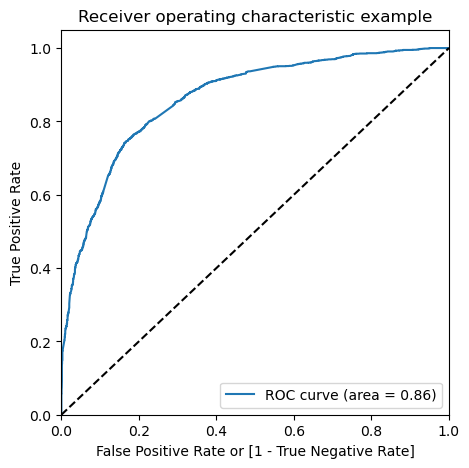

In [127]:
draw_roc(lead_y_train_pred_final['Converted'], lead_y_train_pred_final['Converted_Prob'])
# best model means the curve lies far to the diagonal line 
# X-axis has FPR(1-specificity) , Y-axis has TPR(sensitivity)

**The area under the curve of ROC is 0.86** which can be considered as a good model.

## Step 7 : Finding Optimal Cutoff Point

- We have selected 0.5 above as a temporary cutoff point which was just to check the model performance 
- But in order to get good results we need to optimize the threshold .
- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [128]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lead_y_train_pred_final[i]= lead_y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
lead_y_train_pred_final.head()

Prospect ID  Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0         2735          1        0.727210          1    1    1    1    1    1   
1         4625          1        0.643970          1    1    1    1    1    1   
2         5264          1        0.385125          0    1    1    1    1    0   
3          149          0        0.117989          0    1    1    0    0    0   
4         1377          0        0.120677          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    0    0  
1    1    1    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lead_y_train_pred_final['Converted'], lead_y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.480045     1.000000     0.000000
0.1   0.1  0.571525     0.985988     0.188875
0.2   0.2  0.690135     0.949089     0.451056
0.3   0.3  0.761211     0.897711     0.635188
0.4   0.4  0.785202     0.800560     0.771022
0.5   0.5  0.789013     0.734236     0.839586
0.6   0.6  0.773767     0.667445     0.871928
0.7   0.7  0.737892     0.546007     0.915050
0.8   0.8  0.706502     0.439514     0.952997
0.9   0.9  0.639238     0.265764     0.984045


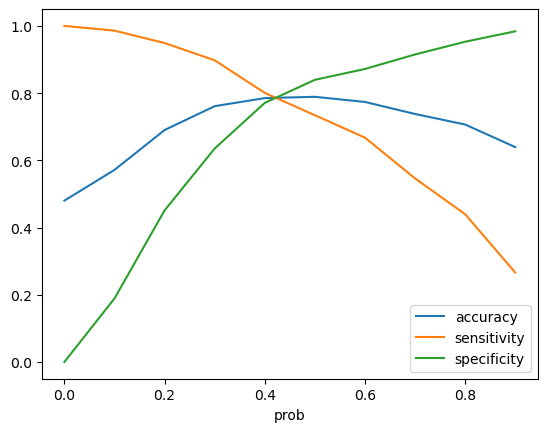

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From above graph we can say that around 0.41 we get optimal values of three metrics. So we can choose our CutOff as 0.41

In [131]:
lead_y_train_pred_final['Final_Predicted'] = lead_y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)
lead_y_train_pred_final.head()

Prospect ID  Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0         2735          1        0.727210          1    1    1    1    1    1   
1         4625          1        0.643970          1    1    1    1    1    1   
2         5264          1        0.385125          0    1    1    1    1    0   
3          149          0        0.117989          0    1    1    0    0    0   
4         1377          0        0.120677          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  Final_Predicted  
0    1    1    1    0    0                1  
1    1    1    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

**Checking Accuracy**

In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(lead_y_train_pred_final.Converted, lead_y_train_pred_final.Final_Predicted)

0.7858744394618834

**Creating Confusion Matrix**

In [133]:
confusion2 = metrics.confusion_matrix(lead_y_train_pred_final.Converted, lead_y_train_pred_final.Final_Predicted )
confusion2

array([[1812,  507],
       [ 448, 1693]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Calcualting Sensitivity
TP / float(TP+FN)

0.7907519850537132

In [136]:
# Calculating Specificity
TN / float(TN+FP)

0.7813712807244502

In [137]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.2186287192755498


In [138]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.7695454545454545


In [139]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8017699115044248


### Precision and Recall

In [140]:
# confusion matrix
confusion = metrics.confusion_matrix(lead_y_train_pred_final.Converted, lead_y_train_pred_final.Predicted )
confusion

array([[1947,  372],
       [ 569, 1572]], dtype=int64)

In [141]:
# calculating Precision : TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.808641975308642

In [142]:
# calculating Recall : TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7342363381597384

**Using sklearn utilities for the same**

In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
precision_score(lead_y_train_pred_final.Converted, lead_y_train_pred_final.Predicted)

0.808641975308642

In [145]:
recall_score(lead_y_train_pred_final.Converted, lead_y_train_pred_final.Predicted)

0.7342363381597384

### Precision and recall tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
lead_y_train_pred_final.Converted, lead_y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 4455    0
 4456    0
 4457    0
 4458    0
 4459    1
 Name: Converted, Length: 4460, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 4455    0
 4456    1
 4457    0
 4458    0
 4459    0
 Name: Predicted, Length: 4460, dtype: int64)

In [148]:
p, r, thresholds = precision_recall_curve(lead_y_train_pred_final.Converted, lead_y_train_pred_final.Converted_Prob)

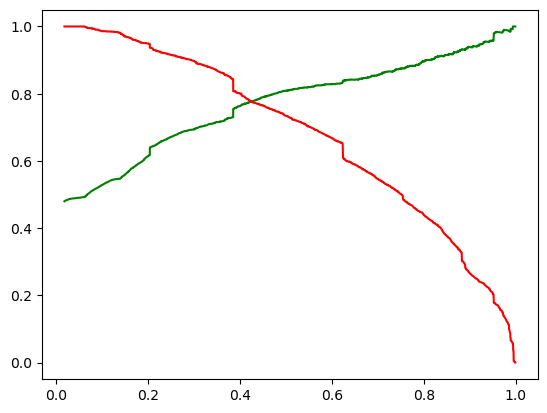

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 8: Making predictions on the test set

In [150]:
lead_X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5765          2.0                         1412                   2.0   
6041          5.0                          559                   5.0   
4122          3.0                          942                   1.5   
4338          0.0                            0                   0.0   
4019          0.0                            0                   0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5765                                    0                          0   
6041                                    0                          0   
4122                                    1                          0   
4338                                    0                          0   
4019                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
5765                        0                           0   
6041                        0                           1   
4122                        0                           1   
4338                        0                           0   
4019                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
5765                     0                   1                      0  ...   
6041                     0                   0                      0  ...   
4122                     0                   0                      0  ...   
4338                     0                   0                      0  ...   
4019                     0                   0                      0  ...   

      Specialization_IT Projects Management  \
5765                                      0   
6041                                      0   
4122                                      0   
4338                                      0   
4019                                      0   

      Specialization_International Business  \
5765                                      0   
6041                                      0   
4122                                      0   
4338                                      0   
4019                                      0   

      Specialization_Marketing Management  \
5765                                    0   
6041                                    0   
4122                                    0   
4338                                    0   
4019                                    0   

      Specialization_Media and Advertising  \
5765                                     0   
6041                                     0   
4122                                     0   
4338                                     0   
4019                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
5765                                     0                                 0   
6041                                     0                                 0   
4122                                     0                                 0   
4338                                     0                                 0   
4019                                     0                                 0   

      Specialization_Rural and Agribusiness  \
5765                                      0   
6041                                      0   
4122                                      0   
4338                                      0   
4019                                      0   

      Specialization_Services Excellence  \
5765                                   0   
6041                                   0   
4122                                   0   
4338                                   0   
4019                                   0   

      Specialization_Supply Chain Management  \
5765                                       0   
6041                                       0   
4122             

**Scaling The Test Data**

In [151]:
lead_X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(lead_X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [152]:
cols = lead_X_train.columns

In [153]:
# Assigning the columns selected by the final model to the lead_X_test 
lead_X_test = lead_X_test[cols]
lead_X_test.head()

Total Time Spent on Website  Lead Source_Olark Chat  \
5765                     1.558072                       0   
6041                     0.044581                       0   
4122                     0.724144                       0   
4338                    -0.947262                       1   
4019                    -0.947262                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
5765                      0                             0                 0   
6041                      0                             0                 0   
4122                      0                             0                 0   
4338                      0                             0                 0   
4019                      1                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
5765                                       0                       0   
6041                                       0                       0   
4122                                       0                       1   
4338                                       0                       0   
4019                                       0                       0   

      What is your current occupation_Student  \
5765                                        0   
6041                                        0   
4122                                        0   
4338                                        0   
4019                                        0   

      What is your current occupation_Unemployed  \
5765                                           1   
6041                                           1   
4122                                           1   
4338                                           1   
4019                                           1   

      Last Notable Activity_Modified  
5765                               1  
6041                               1  
4122                               0  
4338                               0  
4019                               0

In [154]:
lead_X_test_sm = sm.add_constant(lead_X_test)

**Making predictions on the test set**

In [155]:
lead_y_test_pred = res.predict(lead_X_test_sm)

In [156]:
lead_y_test_pred[:10]

5765    0.515513
6041    0.165736
4122    0.732254
4338    0.385125
4019    0.882664
3995    0.354494
2495    0.462307
4208    0.179693
5023    0.746283
2736    0.071591
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
lead_y_pred_1 = pd.DataFrame(lead_y_test_pred)

In [158]:
lead_y_pred_1.head()

0
5765  0.515513
6041  0.165736
4122  0.732254
4338  0.385125
4019  0.882664

In [159]:
# Converting y_test to dataframe
lead_y_test_df = pd.DataFrame(lead_y_test)

In [160]:
# Removing index for both dataframes to append them side by side 
lead_y_pred_1.reset_index(drop=True, inplace=True)
lead_y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
lead_y_pred_final = pd.concat([lead_y_test_df, lead_y_pred_1],axis=1)

In [162]:
lead_y_pred_final.head()

Converted         0
0          1  0.515513
1          0  0.165736
2          1  0.732254
3          1  0.385125
4          1  0.882664

In [163]:
# Renaming the column with name as 0
lead_y_pred_final= lead_y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
lead_y_pred_final.head()

Converted  Converted_Prob
0          1        0.515513
1          0        0.165736
2          1        0.732254
3          1        0.385125
4          1        0.882664

In [165]:
lead_y_pred_final['Prospect ID'] = lead_y_test.index

In [166]:
lead_y_pred_final = lead_y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [167]:
lead_y_pred_final['Final_Predicted'] = lead_y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [168]:
lead_y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Final_Predicted
0         5765          1        0.515513                1
1         6041          0        0.165736                0
2         4122          1        0.732254                1
3         4338          1        0.385125                0
4         4019          1        0.882664                1

In [169]:
# Calculating Accuracy
metrics.accuracy_score(lead_y_pred_final.Converted, lead_y_pred_final.Final_Predicted)

0.7928870292887029

In [170]:
confusion2 = metrics.confusion_matrix(lead_y_pred_final.Converted, lead_y_pred_final.Final_Predicted)
confusion2

array([[778, 210],
       [186, 738]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Calcualting Sensitivity
TP / float(TP+FN)

0.7987012987012987

In [173]:
# Calcualting Specificity
TN / float(TN+FP)

0.7874493927125507

In [174]:
# Calculating Precision
TP / (TP + FP)

0.7784810126582279

In [175]:
# Calculating Recall
TP / (TP + FN)

0.7987012987012987

## Step 9 : Assigning Lead Score to the Testing data

In [176]:
lead_y_pred_final['Lead_Score'] = lead_y_pred_final.Converted_Prob.map(lambda x:round(x*100))
lead_y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Final_Predicted  Lead_Score
0         5765          1        0.515513                1          52
1         6041          0        0.165736                0          17
2         4122          1        0.732254                1          73
3         4338          1        0.385125                0          39
4         4019          1        0.882664                1          88

In [177]:
hot_leads=lead_y_pred_final.loc[lead_y_pred_final["Lead_Score"]>=80]
hot_leads

Prospect ID  Converted  Converted_Prob  Final_Predicted  Lead_Score
4            4019          1        0.882664                1          88
11           5068          1        0.914990                1          91
15           1639          1        0.875925                1          88
23            535          1        0.885800                1          89
24           1867          1        0.831228                1          83
...           ...        ...             ...              ...         ...
1900         4328          1        0.931142                1          93
1903         1016          1        0.946189                1          95
1904          844          1        0.882664                1          88
1908         2056          1        0.833151                1          83
1910         3407          1        0.902724                1          90

[458 rows x 5 columns]

**So we can tell there is a high chance of 458 customers to get converted and the customer center can call these customers.**

**Final Observation:**

**Train Data:**
- Accuracy: 78.58%
- Sensitivity : 79.07%
- Specificity : 78.13%

**Test Data:**
- Accuracy : 79.28%
- Sensitivity : 79.87%
- Specificity : 78.74%

- Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . 
- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. when current occupation is :
a. Student
b. Unemployed
2. When the last activity was :
a. SMS Sent
b. Had a Phone Conversation
3. The total time spend on the Website.
4. When the lead source was:
a. Olark Chat
b. Reference
c. Welingak Website
5. Do Not Email_Yes 

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.